In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import glob
import mcubes
import openmesh as om
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [3]:
np.set_printoptions(threshold=np.inf)
tri_table = [
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [0, 8, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [0, 1, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [1, 8, 3, 9, 8, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [1, 2, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [0, 8, 3, 1, 2, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [9, 2, 10, 0, 2, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [2, 8, 3, 2, 10, 8, 10, 9, 8, -1, -1, -1, -1, -1, -1, -1],
    [3, 11, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [0, 11, 2, 8, 11, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [1, 9, 0, 2, 3, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [1, 11, 2, 1, 9, 11, 9, 8, 11, -1, -1, -1, -1, -1, -1, -1],
    [3, 10, 1, 11, 10, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [0, 10, 1, 0, 8, 10, 8, 11, 10, -1, -1, -1, -1, -1, -1, -1],
    [3, 9, 0, 3, 11, 9, 11, 10, 9, -1, -1, -1, -1, -1, -1, -1],
    [9, 8, 10, 10, 8, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [4, 7, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [4, 3, 0, 7, 3, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [0, 1, 9, 8, 4, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [4, 1, 9, 4, 7, 1, 7, 3, 1, -1, -1, -1, -1, -1, -1, -1],
    [1, 2, 10, 8, 4, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [3, 4, 7, 3, 0, 4, 1, 2, 10, -1, -1, -1, -1, -1, -1, -1],
    [9, 2, 10, 9, 0, 2, 8, 4, 7, -1, -1, -1, -1, -1, -1, -1],
    [2, 10, 9, 2, 9, 7, 2, 7, 3, 7, 9, 4, -1, -1, -1, -1],
    [8, 4, 7, 3, 11, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [11, 4, 7, 11, 2, 4, 2, 0, 4, -1, -1, -1, -1, -1, -1, -1],
    [9, 0, 1, 8, 4, 7, 2, 3, 11, -1, -1, -1, -1, -1, -1, -1],
    [4, 7, 11, 9, 4, 11, 9, 11, 2, 9, 2, 1, -1, -1, -1, -1],
    [3, 10, 1, 3, 11, 10, 7, 8, 4, -1, -1, -1, -1, -1, -1, -1],
    [1, 11, 10, 1, 4, 11, 1, 0, 4, 7, 11, 4, -1, -1, -1, -1],
    [4, 7, 8, 9, 0, 11, 9, 11, 10, 11, 0, 3, -1, -1, -1, -1],
    [4, 7, 11, 4, 11, 9, 9, 11, 10, -1, -1, -1, -1, -1, -1, -1],
    [9, 5, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [9, 5, 4, 0, 8, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [0, 5, 4, 1, 5, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [8, 5, 4, 8, 3, 5, 3, 1, 5, -1, -1, -1, -1, -1, -1, -1],
    [1, 2, 10, 9, 5, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [3, 0, 8, 1, 2, 10, 4, 9, 5, -1, -1, -1, -1, -1, -1, -1],
    [5, 2, 10, 5, 4, 2, 4, 0, 2, -1, -1, -1, -1, -1, -1, -1],
    [2, 10, 5, 3, 2, 5, 3, 5, 4, 3, 4, 8, -1, -1, -1, -1],
    [9, 5, 4, 2, 3, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [0, 11, 2, 0, 8, 11, 4, 9, 5, -1, -1, -1, -1, -1, -1, -1],
    [0, 5, 4, 0, 1, 5, 2, 3, 11, -1, -1, -1, -1, -1, -1, -1],
    [2, 1, 5, 2, 5, 8, 2, 8, 11, 4, 8, 5, -1, -1, -1, -1],
    [10, 3, 11, 10, 1, 3, 9, 5, 4, -1, -1, -1, -1, -1, -1, -1],
    [4, 9, 5, 0, 8, 1, 8, 10, 1, 8, 11, 10, -1, -1, -1, -1],
    [5, 4, 0, 5, 0, 11, 5, 11, 10, 11, 0, 3, -1, -1, -1, -1],
    [5, 4, 8, 5, 8, 10, 10, 8, 11, -1, -1, -1, -1, -1, -1, -1],
    [9, 7, 8, 5, 7, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [9, 3, 0, 9, 5, 3, 5, 7, 3, -1, -1, -1, -1, -1, -1, -1],
    [0, 7, 8, 0, 1, 7, 1, 5, 7, -1, -1, -1, -1, -1, -1, -1],
    [1, 5, 3, 3, 5, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [9, 7, 8, 9, 5, 7, 10, 1, 2, -1, -1, -1, -1, -1, -1, -1],
    [10, 1, 2, 9, 5, 0, 5, 3, 0, 5, 7, 3, -1, -1, -1, -1],
    [8, 0, 2, 8, 2, 5, 8, 5, 7, 10, 5, 2, -1, -1, -1, -1],
    [2, 10, 5, 2, 5, 3, 3, 5, 7, -1, -1, -1, -1, -1, -1, -1],
    [7, 9, 5, 7, 8, 9, 3, 11, 2, -1, -1, -1, -1, -1, -1, -1],
    [9, 5, 7, 9, 7, 2, 9, 2, 0, 2, 7, 11, -1, -1, -1, -1],
    [2, 3, 11, 0, 1, 8, 1, 7, 8, 1, 5, 7, -1, -1, -1, -1],
    [11, 2, 1, 11, 1, 7, 7, 1, 5, -1, -1, -1, -1, -1, -1, -1],
    [9, 5, 8, 8, 5, 7, 10, 1, 3, 10, 3, 11, -1, -1, -1, -1],
    [5, 7, 0, 5, 0, 9, 7, 11, 0, 1, 0, 10, 11, 10, 0, -1],
    [11, 10, 0, 11, 0, 3, 10, 5, 0, 8, 0, 7, 5, 7, 0, -1],
    [11, 10, 5, 7, 11, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [10, 6, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [0, 8, 3, 5, 10, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [9, 0, 1, 5, 10, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [1, 8, 3, 1, 9, 8, 5, 10, 6, -1, -1, -1, -1, -1, -1, -1],
    [1, 6, 5, 2, 6, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [1, 6, 5, 1, 2, 6, 3, 0, 8, -1, -1, -1, -1, -1, -1, -1],
    [9, 6, 5, 9, 0, 6, 0, 2, 6, -1, -1, -1, -1, -1, -1, -1],
    [5, 9, 8, 5, 8, 2, 5, 2, 6, 3, 2, 8, -1, -1, -1, -1],
    [2, 3, 11, 10, 6, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [11, 0, 8, 11, 2, 0, 10, 6, 5, -1, -1, -1, -1, -1, -1, -1],
    [0, 1, 9, 2, 3, 11, 5, 10, 6, -1, -1, -1, -1, -1, -1, -1],
    [5, 10, 6, 1, 9, 2, 9, 11, 2, 9, 8, 11, -1, -1, -1, -1],
    [6, 3, 11, 6, 5, 3, 5, 1, 3, -1, -1, -1, -1, -1, -1, -1],
    [0, 8, 11, 0, 11, 5, 0, 5, 1, 5, 11, 6, -1, -1, -1, -1],
    [3, 11, 6, 0, 3, 6, 0, 6, 5, 0, 5, 9, -1, -1, -1, -1],
    [6, 5, 9, 6, 9, 11, 11, 9, 8, -1, -1, -1, -1, -1, -1, -1],
    [5, 10, 6, 4, 7, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [4, 3, 0, 4, 7, 3, 6, 5, 10, -1, -1, -1, -1, -1, -1, -1],
    [1, 9, 0, 5, 10, 6, 8, 4, 7, -1, -1, -1, -1, -1, -1, -1],
    [10, 6, 5, 1, 9, 7, 1, 7, 3, 7, 9, 4, -1, -1, -1, -1],
    [6, 1, 2, 6, 5, 1, 4, 7, 8, -1, -1, -1, -1, -1, -1, -1],
    [1, 2, 5, 5, 2, 6, 3, 0, 4, 3, 4, 7, -1, -1, -1, -1],
    [8, 4, 7, 9, 0, 5, 0, 6, 5, 0, 2, 6, -1, -1, -1, -1],
    [7, 3, 9, 7, 9, 4, 3, 2, 9, 5, 9, 6, 2, 6, 9, -1],
    [3, 11, 2, 7, 8, 4, 10, 6, 5, -1, -1, -1, -1, -1, -1, -1],
    [5, 10, 6, 4, 7, 2, 4, 2, 0, 2, 7, 11, -1, -1, -1, -1],
    [0, 1, 9, 4, 7, 8, 2, 3, 11, 5, 10, 6, -1, -1, -1, -1],
    [9, 2, 1, 9, 11, 2, 9, 4, 11, 7, 11, 4, 5, 10, 6, -1],
    [8, 4, 7, 3, 11, 5, 3, 5, 1, 5, 11, 6, -1, -1, -1, -1],
    [5, 1, 11, 5, 11, 6, 1, 0, 11, 7, 11, 4, 0, 4, 11, -1],
    [0, 5, 9, 0, 6, 5, 0, 3, 6, 11, 6, 3, 8, 4, 7, -1],
    [6, 5, 9, 6, 9, 11, 4, 7, 9, 7, 11, 9, -1, -1, -1, -1],
    [10, 4, 9, 6, 4, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [4, 10, 6, 4, 9, 10, 0, 8, 3, -1, -1, -1, -1, -1, -1, -1],
    [10, 0, 1, 10, 6, 0, 6, 4, 0, -1, -1, -1, -1, -1, -1, -1],
    [8, 3, 1, 8, 1, 6, 8, 6, 4, 6, 1, 10, -1, -1, -1, -1],
    [1, 4, 9, 1, 2, 4, 2, 6, 4, -1, -1, -1, -1, -1, -1, -1],
    [3, 0, 8, 1, 2, 9, 2, 4, 9, 2, 6, 4, -1, -1, -1, -1],
    [0, 2, 4, 4, 2, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [8, 3, 2, 8, 2, 4, 4, 2, 6, -1, -1, -1, -1, -1, -1, -1],
    [10, 4, 9, 10, 6, 4, 11, 2, 3, -1, -1, -1, -1, -1, -1, -1],
    [0, 8, 2, 2, 8, 11, 4, 9, 10, 4, 10, 6, -1, -1, -1, -1],
    [3, 11, 2, 0, 1, 6, 0, 6, 4, 6, 1, 10, -1, -1, -1, -1],
    [6, 4, 1, 6, 1, 10, 4, 8, 1, 2, 1, 11, 8, 11, 1, -1],
    [9, 6, 4, 9, 3, 6, 9, 1, 3, 11, 6, 3, -1, -1, -1, -1],
    [8, 11, 1, 8, 1, 0, 11, 6, 1, 9, 1, 4, 6, 4, 1, -1],
    [3, 11, 6, 3, 6, 0, 0, 6, 4, -1, -1, -1, -1, -1, -1, -1],
    [6, 4, 8, 11, 6, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [7, 10, 6, 7, 8, 10, 8, 9, 10, -1, -1, -1, -1, -1, -1, -1],
    [0, 7, 3, 0, 10, 7, 0, 9, 10, 6, 7, 10, -1, -1, -1, -1],
    [10, 6, 7, 1, 10, 7, 1, 7, 8, 1, 8, 0, -1, -1, -1, -1],
    [10, 6, 7, 10, 7, 1, 1, 7, 3, -1, -1, -1, -1, -1, -1, -1],
    [1, 2, 6, 1, 6, 8, 1, 8, 9, 8, 6, 7, -1, -1, -1, -1],
    [2, 6, 9, 2, 9, 1, 6, 7, 9, 0, 9, 3, 7, 3, 9, -1],
    [7, 8, 0, 7, 0, 6, 6, 0, 2, -1, -1, -1, -1, -1, -1, -1],
    [7, 3, 2, 6, 7, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [2, 3, 11, 10, 6, 8, 10, 8, 9, 8, 6, 7, -1, -1, -1, -1],
    [2, 0, 7, 2, 7, 11, 0, 9, 7, 6, 7, 10, 9, 10, 7, -1],
    [1, 8, 0, 1, 7, 8, 1, 10, 7, 6, 7, 10, 2, 3, 11, -1],
    [11, 2, 1, 11, 1, 7, 10, 6, 1, 6, 7, 1, -1, -1, -1, -1],
    [8, 9, 6, 8, 6, 7, 9, 1, 6, 11, 6, 3, 1, 3, 6, -1],
    [0, 9, 1, 11, 6, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [7, 8, 0, 7, 0, 6, 3, 11, 0, 11, 6, 0, -1, -1, -1, -1],
    [7, 11, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [7, 6, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [3, 0, 8, 11, 7, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [0, 1, 9, 11, 7, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [8, 1, 9, 8, 3, 1, 11, 7, 6, -1, -1, -1, -1, -1, -1, -1],
    [10, 1, 2, 6, 11, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [1, 2, 10, 3, 0, 8, 6, 11, 7, -1, -1, -1, -1, -1, -1, -1],
    [2, 9, 0, 2, 10, 9, 6, 11, 7, -1, -1, -1, -1, -1, -1, -1],
    [6, 11, 7, 2, 10, 3, 10, 8, 3, 10, 9, 8, -1, -1, -1, -1],
    [7, 2, 3, 6, 2, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [7, 0, 8, 7, 6, 0, 6, 2, 0, -1, -1, -1, -1, -1, -1, -1],
    [2, 7, 6, 2, 3, 7, 0, 1, 9, -1, -1, -1, -1, -1, -1, -1],
    [1, 6, 2, 1, 8, 6, 1, 9, 8, 8, 7, 6, -1, -1, -1, -1],
    [10, 7, 6, 10, 1, 7, 1, 3, 7, -1, -1, -1, -1, -1, -1, -1],
    [10, 7, 6, 1, 7, 10, 1, 8, 7, 1, 0, 8, -1, -1, -1, -1],
    [0, 3, 7, 0, 7, 10, 0, 10, 9, 6, 10, 7, -1, -1, -1, -1],
    [7, 6, 10, 7, 10, 8, 8, 10, 9, -1, -1, -1, -1, -1, -1, -1],
    [6, 8, 4, 11, 8, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [3, 6, 11, 3, 0, 6, 0, 4, 6, -1, -1, -1, -1, -1, -1, -1],
    [8, 6, 11, 8, 4, 6, 9, 0, 1, -1, -1, -1, -1, -1, -1, -1],
    [9, 4, 6, 9, 6, 3, 9, 3, 1, 11, 3, 6, -1, -1, -1, -1],
    [6, 8, 4, 6, 11, 8, 2, 10, 1, -1, -1, -1, -1, -1, -1, -1],
    [1, 2, 10, 3, 0, 11, 0, 6, 11, 0, 4, 6, -1, -1, -1, -1],
    [4, 11, 8, 4, 6, 11, 0, 2, 9, 2, 10, 9, -1, -1, -1, -1],
    [10, 9, 3, 10, 3, 2, 9, 4, 3, 11, 3, 6, 4, 6, 3, -1],
    [8, 2, 3, 8, 4, 2, 4, 6, 2, -1, -1, -1, -1, -1, -1, -1],
    [0, 4, 2, 4, 6, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [1, 9, 0, 2, 3, 4, 2, 4, 6, 4, 3, 8, -1, -1, -1, -1],
    [1, 9, 4, 1, 4, 2, 2, 4, 6, -1, -1, -1, -1, -1, -1, -1],
    [8, 1, 3, 8, 6, 1, 8, 4, 6, 6, 10, 1, -1, -1, -1, -1],
    [10, 1, 0, 10, 0, 6, 6, 0, 4, -1, -1, -1, -1, -1, -1, -1],
    [4, 6, 3, 4, 3, 8, 6, 10, 3, 0, 3, 9, 10, 9, 3, -1],
    [10, 9, 4, 6, 10, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [4, 9, 5, 7, 6, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [0, 8, 3, 4, 9, 5, 11, 7, 6, -1, -1, -1, -1, -1, -1, -1],
    [5, 0, 1, 5, 4, 0, 7, 6, 11, -1, -1, -1, -1, -1, -1, -1],
    [11, 7, 6, 8, 3, 4, 3, 5, 4, 3, 1, 5, -1, -1, -1, -1],
    [9, 5, 4, 10, 1, 2, 7, 6, 11, -1, -1, -1, -1, -1, -1, -1],
    [6, 11, 7, 1, 2, 10, 0, 8, 3, 4, 9, 5, -1, -1, -1, -1],
    [7, 6, 11, 5, 4, 10, 4, 2, 10, 4, 0, 2, -1, -1, -1, -1],
    [3, 4, 8, 3, 5, 4, 3, 2, 5, 10, 5, 2, 11, 7, 6, -1],
    [7, 2, 3, 7, 6, 2, 5, 4, 9, -1, -1, -1, -1, -1, -1, -1],
    [9, 5, 4, 0, 8, 6, 0, 6, 2, 6, 8, 7, -1, -1, -1, -1],
    [3, 6, 2, 3, 7, 6, 1, 5, 0, 5, 4, 0, -1, -1, -1, -1],
    [6, 2, 8, 6, 8, 7, 2, 1, 8, 4, 8, 5, 1, 5, 8, -1],
    [9, 5, 4, 10, 1, 6, 1, 7, 6, 1, 3, 7, -1, -1, -1, -1],
    [1, 6, 10, 1, 7, 6, 1, 0, 7, 8, 7, 0, 9, 5, 4, -1],
    [4, 0, 10, 4, 10, 5, 0, 3, 10, 6, 10, 7, 3, 7, 10, -1],
    [7, 6, 10, 7, 10, 8, 5, 4, 10, 4, 8, 10, -1, -1, -1, -1],
    [6, 9, 5, 6, 11, 9, 11, 8, 9, -1, -1, -1, -1, -1, -1, -1],
    [3, 6, 11, 0, 6, 3, 0, 5, 6, 0, 9, 5, -1, -1, -1, -1],
    [0, 11, 8, 0, 5, 11, 0, 1, 5, 5, 6, 11, -1, -1, -1, -1],
    [6, 11, 3, 6, 3, 5, 5, 3, 1, -1, -1, -1, -1, -1, -1, -1],
    [1, 2, 10, 9, 5, 11, 9, 11, 8, 11, 5, 6, -1, -1, -1, -1],
    [0, 11, 3, 0, 6, 11, 0, 9, 6, 5, 6, 9, 1, 2, 10, -1],
    [11, 8, 5, 11, 5, 6, 8, 0, 5, 10, 5, 2, 0, 2, 5, -1],
    [6, 11, 3, 6, 3, 5, 2, 10, 3, 10, 5, 3, -1, -1, -1, -1],
    [5, 8, 9, 5, 2, 8, 5, 6, 2, 3, 8, 2, -1, -1, -1, -1],
    [9, 5, 6, 9, 6, 0, 0, 6, 2, -1, -1, -1, -1, -1, -1, -1],
    [1, 5, 8, 1, 8, 0, 5, 6, 8, 3, 8, 2, 6, 2, 8, -1],
    [1, 5, 6, 2, 1, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [1, 3, 6, 1, 6, 10, 3, 8, 6, 5, 6, 9, 8, 9, 6, -1],
    [10, 1, 0, 10, 0, 6, 9, 5, 0, 5, 6, 0, -1, -1, -1, -1],
    [0, 3, 8, 5, 6, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [10, 5, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [11, 5, 10, 7, 5, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [11, 5, 10, 11, 7, 5, 8, 3, 0, -1, -1, -1, -1, -1, -1, -1],
    [5, 11, 7, 5, 10, 11, 1, 9, 0, -1, -1, -1, -1, -1, -1, -1],
    [10, 7, 5, 10, 11, 7, 9, 8, 1, 8, 3, 1, -1, -1, -1, -1],
    [11, 1, 2, 11, 7, 1, 7, 5, 1, -1, -1, -1, -1, -1, -1, -1],
    [0, 8, 3, 1, 2, 7, 1, 7, 5, 7, 2, 11, -1, -1, -1, -1],
    [9, 7, 5, 9, 2, 7, 9, 0, 2, 2, 11, 7, -1, -1, -1, -1],
    [7, 5, 2, 7, 2, 11, 5, 9, 2, 3, 2, 8, 9, 8, 2, -1],
    [2, 5, 10, 2, 3, 5, 3, 7, 5, -1, -1, -1, -1, -1, -1, -1],
    [8, 2, 0, 8, 5, 2, 8, 7, 5, 10, 2, 5, -1, -1, -1, -1],
    [9, 0, 1, 5, 10, 3, 5, 3, 7, 3, 10, 2, -1, -1, -1, -1],
    [9, 8, 2, 9, 2, 1, 8, 7, 2, 10, 2, 5, 7, 5, 2, -1],
    [1, 3, 5, 3, 7, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [0, 8, 7, 0, 7, 1, 1, 7, 5, -1, -1, -1, -1, -1, -1, -1],
    [9, 0, 3, 9, 3, 5, 5, 3, 7, -1, -1, -1, -1, -1, -1, -1],
    [9, 8, 7, 5, 9, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [5, 8, 4, 5, 10, 8, 10, 11, 8, -1, -1, -1, -1, -1, -1, -1],
    [5, 0, 4, 5, 11, 0, 5, 10, 11, 11, 3, 0, -1, -1, -1, -1],
    [0, 1, 9, 8, 4, 10, 8, 10, 11, 10, 4, 5, -1, -1, -1, -1],
    [10, 11, 4, 10, 4, 5, 11, 3, 4, 9, 4, 1, 3, 1, 4, -1],
    [2, 5, 1, 2, 8, 5, 2, 11, 8, 4, 5, 8, -1, -1, -1, -1],
    [0, 4, 11, 0, 11, 3, 4, 5, 11, 2, 11, 1, 5, 1, 11, -1],
    [0, 2, 5, 0, 5, 9, 2, 11, 5, 4, 5, 8, 11, 8, 5, -1],
    [9, 4, 5, 2, 11, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [2, 5, 10, 3, 5, 2, 3, 4, 5, 3, 8, 4, -1, -1, -1, -1],
    [5, 10, 2, 5, 2, 4, 4, 2, 0, -1, -1, -1, -1, -1, -1, -1],
    [3, 10, 2, 3, 5, 10, 3, 8, 5, 4, 5, 8, 0, 1, 9, -1],
    [5, 10, 2, 5, 2, 4, 1, 9, 2, 9, 4, 2, -1, -1, -1, -1],
    [8, 4, 5, 8, 5, 3, 3, 5, 1, -1, -1, -1, -1, -1, -1, -1],
    [0, 4, 5, 1, 0, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [8, 4, 5, 8, 5, 3, 9, 0, 5, 0, 3, 5, -1, -1, -1, -1],
    [9, 4, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [4, 11, 7, 4, 9, 11, 9, 10, 11, -1, -1, -1, -1, -1, -1, -1],
    [0, 8, 3, 4, 9, 7, 9, 11, 7, 9, 10, 11, -1, -1, -1, -1],
    [1, 10, 11, 1, 11, 4, 1, 4, 0, 7, 4, 11, -1, -1, -1, -1],
    [3, 1, 4, 3, 4, 8, 1, 10, 4, 7, 4, 11, 10, 11, 4, -1],
    [4, 11, 7, 9, 11, 4, 9, 2, 11, 9, 1, 2, -1, -1, -1, -1],
    [9, 7, 4, 9, 11, 7, 9, 1, 11, 2, 11, 1, 0, 8, 3, -1],
    [11, 7, 4, 11, 4, 2, 2, 4, 0, -1, -1, -1, -1, -1, -1, -1],
    [11, 7, 4, 11, 4, 2, 8, 3, 4, 3, 2, 4, -1, -1, -1, -1],
    [2, 9, 10, 2, 7, 9, 2, 3, 7, 7, 4, 9, -1, -1, -1, -1],
    [9, 10, 7, 9, 7, 4, 10, 2, 7, 8, 7, 0, 2, 0, 7, -1],
    [3, 7, 10, 3, 10, 2, 7, 4, 10, 1, 10, 0, 4, 0, 10, -1],
    [1, 10, 2, 8, 7, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [4, 9, 1, 4, 1, 7, 7, 1, 3, -1, -1, -1, -1, -1, -1, -1],
    [4, 9, 1, 4, 1, 7, 0, 8, 1, 8, 7, 1, -1, -1, -1, -1],
    [4, 0, 3, 7, 4, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [4, 8, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [9, 10, 8, 10, 11, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [3, 0, 9, 3, 9, 11, 11, 9, 10, -1, -1, -1, -1, -1, -1, -1],
    [0, 1, 10, 0, 10, 8, 8, 10, 11, -1, -1, -1, -1, -1, -1, -1],
    [3, 1, 10, 11, 3, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [1, 2, 11, 1, 11, 9, 9, 11, 8, -1, -1, -1, -1, -1, -1, -1],
    [3, 0, 9, 3, 9, 11, 1, 2, 9, 2, 11, 9, -1, -1, -1, -1],
    [0, 2, 11, 8, 0, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [3, 2, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [2, 3, 8, 2, 8, 10, 10, 8, 9, -1, -1, -1, -1, -1, -1, -1],
    [9, 10, 2, 0, 9, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [2, 3, 8, 2, 8, 10, 0, 1, 8, 1, 10, 8, -1, -1, -1, -1],
    [1, 10, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [1, 3, 8, 9, 1, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [0, 9, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [0, 3, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
]
edge_table = [
    0x0  , 0x109, 0x203, 0x30a, 0x406, 0x50f, 0x605, 0x70c,
    0x80c, 0x905, 0xa0f, 0xb06, 0xc0a, 0xd03, 0xe09, 0xf00,
    0x190, 0x99 , 0x393, 0x29a, 0x596, 0x49f, 0x795, 0x69c,
    0x99c, 0x895, 0xb9f, 0xa96, 0xd9a, 0xc93, 0xf99, 0xe90,
    0x230, 0x339, 0x33 , 0x13a, 0x636, 0x73f, 0x435, 0x53c,
    0xa3c, 0xb35, 0x83f, 0x936, 0xe3a, 0xf33, 0xc39, 0xd30,
    0x3a0, 0x2a9, 0x1a3, 0xaa , 0x7a6, 0x6af, 0x5a5, 0x4ac,
    0xbac, 0xaa5, 0x9af, 0x8a6, 0xfaa, 0xea3, 0xda9, 0xca0,
    0x460, 0x569, 0x663, 0x76a, 0x66 , 0x16f, 0x265, 0x36c,
    0xc6c, 0xd65, 0xe6f, 0xf66, 0x86a, 0x963, 0xa69, 0xb60,
    0x5f0, 0x4f9, 0x7f3, 0x6fa, 0x1f6, 0xff , 0x3f5, 0x2fc,
    0xdfc, 0xcf5, 0xfff, 0xef6, 0x9fa, 0x8f3, 0xbf9, 0xaf0,
    0x650, 0x759, 0x453, 0x55a, 0x256, 0x35f, 0x55 , 0x15c,
    0xe5c, 0xf55, 0xc5f, 0xd56, 0xa5a, 0xb53, 0x859, 0x950,
    0x7c0, 0x6c9, 0x5c3, 0x4ca, 0x3c6, 0x2cf, 0x1c5, 0xcc ,
    0xfcc, 0xec5, 0xdcf, 0xcc6, 0xbca, 0xac3, 0x9c9, 0x8c0,
    0x8c0, 0x9c9, 0xac3, 0xbca, 0xcc6, 0xdcf, 0xec5, 0xfcc,
    0xcc , 0x1c5, 0x2cf, 0x3c6, 0x4ca, 0x5c3, 0x6c9, 0x7c0,
    0x950, 0x859, 0xb53, 0xa5a, 0xd56, 0xc5f, 0xf55, 0xe5c,
    0x15c, 0x55 , 0x35f, 0x256, 0x55a, 0x453, 0x759, 0x650,
    0xaf0, 0xbf9, 0x8f3, 0x9fa, 0xef6, 0xfff, 0xcf5, 0xdfc,
    0x2fc, 0x3f5, 0xff , 0x1f6, 0x6fa, 0x7f3, 0x4f9, 0x5f0,
    0xb60, 0xa69, 0x963, 0x86a, 0xf66, 0xe6f, 0xd65, 0xc6c,
    0x36c, 0x265, 0x16f, 0x66 , 0x76a, 0x663, 0x569, 0x460,
    0xca0, 0xda9, 0xea3, 0xfaa, 0x8a6, 0x9af, 0xaa5, 0xbac,
    0x4ac, 0x5a5, 0x6af, 0x7a6, 0xaa , 0x1a3, 0x2a9, 0x3a0,
    0xd30, 0xc39, 0xf33, 0xe3a, 0x936, 0x83f, 0xb35, 0xa3c,
    0x53c, 0x435, 0x73f, 0x636, 0x13a, 0x33 , 0x339, 0x230,
    0xe90, 0xf99, 0xc93, 0xd9a, 0xa96, 0xb9f, 0x895, 0x99c,
    0x69c, 0x795, 0x49f, 0x596, 0x29a, 0x393, 0x99 , 0x190,
    0xf00, 0xe09, 0xd03, 0xc0a, 0xb06, 0xa0f, 0x905, 0x80c,
    0x70c, 0x605, 0x50f, 0x406, 0x30a, 0x203, 0x109, 0x0
]

In [12]:
# read dcm files
folder = './visualization-data/dicom_data'
dcm_files = glob.glob(folder + '/*.dcm')
slices = []
for file in dcm_files:
    slices.append(pydicom.dcmread(file))
slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
slice_thickness = slices[0].SliceThickness
# print(slices)
# print(slice_thickness)

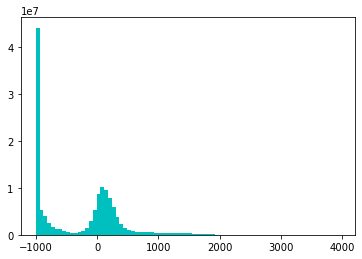

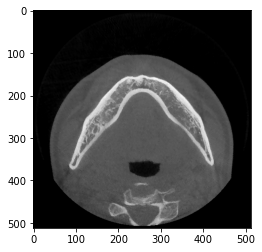

In [5]:
# convert to hu
image = np.stack([s.pixel_array for s in slices])
image_hu = image.astype(np.int16)
image_hu[image_hu == -2000] = 0

intercept = slices[0].RescaleIntercept
slope = slices[0].RescaleSlope
if slope != 1:
    image_hu = slope * image_hu.astype(np.float64)
    image_hu = image_hu.astype(np.int16)
image_hu += np.int16(intercept)
image_hu = np.array(image_hu, dtype=np.int16)

plt.hist(image_hu.flatten(), bins=80, color='c')
plt.show()
plt.imshow(image_hu[80], cmap=plt.cm.gray)
plt.show()

(0.0, 507.0)

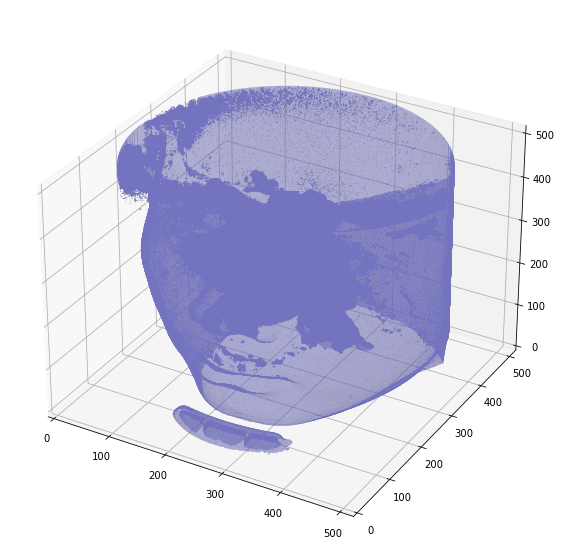

In [6]:
# scikit-image test
p = image_hu.transpose(2, 1, 0)

verts, faces, norm, val = measure.marching_cubes(p, level=-300)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
mesh = Poly3DCollection(verts[faces], alpha=0.70)
face_color = [0.45, 0.45, 0.75]
mesh.set_facecolor(face_color)
ax.add_collection3d(mesh)

ax.set_xlim(0, p.shape[0])
ax.set_ylim(0, p.shape[1])
ax.set_zlim(0, p.shape[2])

(3031444, 3)
(5874560, 3)


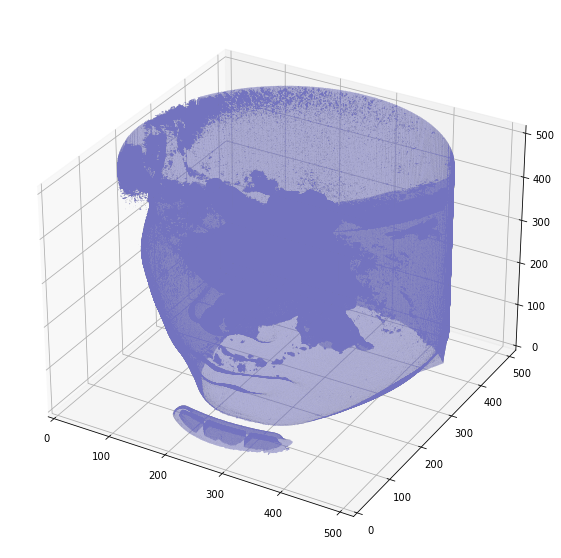

In [7]:
# PyMCubes test
p = image_hu.transpose(2, 1, 0)

verts, faces = mcubes.marching_cubes(p, -300)
mcubes.export_obj(verts, faces, 'test.obj')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
mesh = Poly3DCollection(verts[faces], alpha=0.70)
face_color = [0.45, 0.45, 0.75]
mesh.set_facecolor(face_color)
ax.add_collection3d(mesh)

ax.set_xlim(0, p.shape[0])
ax.set_ylim(0, p.shape[1])
ax.set_zlim(0, p.shape[2])
print(verts.shape)
print(faces.shape)

In [8]:
def get_triangle_array(x, y, z):
    index = 0
    if image_hu[x][y][z] <= isolevel:
        index |= 1
    if image_hu[x + 1][y][z] <= isolevel:
        index |= 2
    if image_hu[x + 1][y][z + 1] <= isolevel:
        index |= 4
    if image_hu[x][y][z + 1] <= isolevel:
        index |= 8
    if image_hu[x][y + 1][z] <= isolevel:
        index |= 16
    if image_hu[x + 1][y + 1][z] <= isolevel:
        index |= 32
    if image_hu[x + 1][y + 1][z + 1] <= isolevel:
        index |= 64
    if image_hu[x][y + 1][z + 1] <= isolevel:
        index |= 128
    return tri_table[index]

In [9]:
def get_interpolate_value(v1, v2, p):
    if abs(p - v1) < 0.00001:
        return 0
    elif abs(p - v2) < 0.00001:
        return 1
    elif abs(v1 - v2) < 0.00001:
        return 0
    elif p > v1 and p > v2:
        return None
    elif p < v1 and p < v2:
        return None
    else:
        return (p - v1) / (v2 - v1)

In [10]:
cache = {}
def get_interpolate_point(x, y, z, edge):
    interpolate_value = 0
    point = None
    if edge == 0:
        if ((x, y, z), (x + 1, y, z)) in cache:
            point = cache[((x, y, z), (x + 1, y, z))]
        else:
            interpolate_value = get_interpolate_value(image_hu[x][y][z], image_hu[x + 1][y][z], isolevel)
            if interpolate_value is None:
                return None
            point = (x + interpolate_value, y, z)
            cache[((x, y, z), (x + 1, y, z))] = point
        return point
    if edge == 1:
        if ((x + 1, y, z), (x + 1, y, z + 1)) in cache:
            point = cache[((x + 1, y, z), (x + 1, y, z + 1))]
        else:
            interpolate_value = get_interpolate_value(image_hu[x + 1][y][z], image_hu[x + 1][y][z + 1], isolevel)
            if interpolate_value is None:
                return None
            point = (x + 1, y, z + interpolate_value)
            cache[((x + 1, y, z), (x + 1, y, z + 1))] = point
        return point
    if edge == 2:
        if ((x, y, z + 1), (x + 1, y, z + 1)) in cache:
            point = cache[((x, y, z + 1), (x + 1, y, z + 1))]
        else:
            interpolate_value = get_interpolate_value(image_hu[x][y][z + 1], image_hu[x + 1][y][z + 1], isolevel)
            if interpolate_value is None:
                return None
            point = (x + interpolate_value, y, z + 1)
            cache[((x, y, z + 1), (x + 1, y, z + 1))] = point
        return point
    if edge == 3:
        if ((x, y, z), (x, y, z + 1)) in cache:
            point = cache[((x, y, z), (x, y, z + 1))]
        else:
            interpolate_value = get_interpolate_value(image_hu[x][y][z], image_hu[x][y][z + 1], isolevel)
            if interpolate_value is None:
                return None
            point = (x, y, z + interpolate_value)
            cache[((x, y, z), (x, y, z + 1))] = point
        return point
    if edge == 4:
        if ((x, y + 1, z), (x + 1, y + 1, z)) in cache:
            point = cache[((x, y + 1, z), (x + 1, y + 1, z))]
        else:
            interpolate_value = get_interpolate_value(image_hu[x][y + 1][z], image_hu[x + 1][y + 1][z], isolevel)
            if interpolate_value is None:
                return None
            point = (x + interpolate_value, y + 1, z)
            cache[((x, y + 1, z), (x + 1, y + 1, z))] = point
        return point
    if edge == 5:
        if ((x + 1, y + 1, z), (x + 1, y + 1, z + 1)) in cache:
            point = cache[((x + 1, y + 1, z), (x + 1, y + 1, z + 1))]
        else:
            interpolate_value = get_interpolate_value(image_hu[x + 1][y + 1][z], image_hu[x + 1][y + 1][z + 1], isolevel)
            if interpolate_value is None:
                return None
            point = (x + 1, y + 1, z + interpolate_value)
            cache[((x + 1, y + 1, z), (x + 1, y + 1, z + 1))] = point
        return point
    if edge == 6:
        if ((x, y + 1, z + 1), (x + 1, y + 1, z + 1)) in cache:
            point = cache[((x, y + 1, z + 1), (x + 1, y + 1, z + 1))]
        else:
            interpolate_value = get_interpolate_value(image_hu[x][y + 1][z + 1], image_hu[x + 1][y + 1][z + 1], isolevel)
            if interpolate_value is None:
                return None
            point = (x + interpolate_value, y + 1, z + 1)
            cache[((x, y + 1, z + 1), (x + 1, y + 1, z + 1))] = point
        return point
    if edge == 7:
        if ((x, y + 1, z), (x, y + 1, z + 1)) in cache:
            point = cache[((x, y + 1, z), (x, y + 1, z + 1))]
        else:
            interpolate_value = get_interpolate_value(image_hu[x][y + 1][z], image_hu[x][y + 1][z + 1], isolevel)
            if interpolate_value is None:
                return None
            point = (x, y + 1, z + interpolate_value)
            cache[((x, y + 1, z), (x, y + 1, z + 1))] = point
        return point
    if edge == 8:
        if ((x, y, z), (x, y + 1, z)) in cache:
            point = cache[((x, y, z), (x, y + 1, z))]
        else:
            interpolate_value = get_interpolate_value(image_hu[x][y][z], image_hu[x][y + 1][z], isolevel)
            if interpolate_value is None:
                return None
            point = (x, y + interpolate_value, z)
            cache[((x, y, z), (x, y + 1, z))] = point
        return point
    if edge == 9:
        if ((x + 1, y, z), (x + 1, y + 1, z)) in cache:
            point = cache[((x + 1, y, z), (x + 1, y + 1, z))]
        else:
            interpolate_value = get_interpolate_value(image_hu[x + 1][y][z], image_hu[x + 1][y + 1][z], isolevel)
            if interpolate_value is None:
                return None
            point = (x + 1, y + interpolate_value, z)
            cache[((x + 1, y, z), (x + 1, y + 1, z))] = point
        return point
    if edge == 10:
        if ((x + 1, y, z + 1), (x + 1, y + 1, z + 1)) in cache:
            point = cache[((x + 1, y, z + 1), (x + 1, y + 1, z + 1))]
        else:
            interpolate_value = get_interpolate_value(image_hu[x + 1][y][z + 1], image_hu[x + 1][y + 1][z + 1], isolevel)
            if interpolate_value is None:
                return None
            point = (x + 1, y + interpolate_value, z + 1)
            cache[((x + 1, y, z + 1), (x + 1, y + 1, z + 1))] = point
        return point
    if edge == 11:
        if ((x, y, z + 1), (x, y + 1, z + 1)) in cache:
            point = cache[((x, y, z + 1), (x, y + 1, z + 1))]
        else:
            interpolate_value = get_interpolate_value(image_hu[x][y][z + 1], image_hu[x][y + 1][z + 1], isolevel)
            if interpolate_value is None:
                return None
            point = (x, y + interpolate_value, z + 1)
            cache[((x, y, z + 1), (x, y + 1, z + 1))] = point
        return point

In [31]:
image_hu = image_hu.transpose(1, 0, 2)
isolevel = -300

verts = []
faces = []
vert_index = {}

for x in range(0, image_hu.shape[0] - 1):
    for y in range(0, image_hu.shape[1] - 1):
        for z in range(0, image_hu.shape[2] - 1):
            triangle_array = get_triangle_array(x, y, z)
            tri_index = 0
            while triangle_array[tri_index] != -1:
                v1 = get_interpolate_point(x, y, z, triangle_array[tri_index])
                if v1 is None:
                    tri_index += 3
                    continue
                v2 = get_interpolate_point(x, y, z, triangle_array[tri_index + 1])
                if v2 is None:
                    tri_index += 3
                    continue
                v3 = get_interpolate_point(x, y, z, triangle_array[tri_index + 2])
                if v3 is None:
                    tri_index += 3
                    continue
                
                tri_index += 3
                if v1 not in vert_index:
                    vert_index[v1] = len(vert_index)
                    verts.append(np.array(v1))
                if v2 not in vert_index:
                    vert_index[v2] = len(vert_index)
                    verts.append(np.array(v2))
                if v3 not in vert_index:
                    vert_index[v3] = len(vert_index)
                    verts.append(np.array(v3))
                faces.append([vert_index[v1], vert_index[v2], vert_index[v3]])

verts = np.array(verts)
faces = np.array(faces)

In [32]:
print(verts.shape)
print(faces.shape)

(3011588, 3)
(5874560, 3)


(0.0, 512.0)

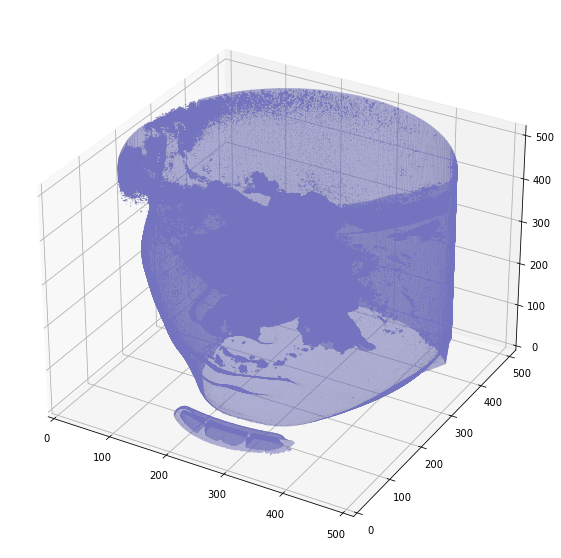

In [34]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
mesh = Poly3DCollection(verts[faces], alpha=0.70)
face_color = [0.45, 0.45, 0.75]
mesh.set_facecolor(face_color)
ax.add_collection3d(mesh)

ax.set_xlim(0, image_hu.shape[0])
ax.set_ylim(0, image_hu.shape[1])
ax.set_zlim(0, image_hu.shape[2])

In [35]:
mesh = om.TriMesh()
verts_m = []

for vert in verts:
    verts_m.append(mesh.add_vertex(vert))
for face in faces:
    mesh.add_face(verts_m[face[0]], verts_m[face[1]], verts_m[face[2]])

om.write_mesh('{0}.obj'.format(isolevel), mesh)